# September Bear

In [1]:
import pandas as pd
import yfinance as yf

import available as avb
import utils as self_utils
from quantified_strategies import utils

C:\Users\tomw1\AppData\Local\Temp\ipykernel_20876\1990966001.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def get_positions(df: pd.DataFrame) -> pd.Series:

    data = df.loc[df.index.month == MONTH].copy()
    data["weekday"] = data.index.map(lambda date: date.weekday())
    data["is_xday"] = data["weekday"] == SHORT_DAY
    data["year"] = data.index.year
    data["nth_xday"] = data.groupby("year")["is_xday"].cumsum()

    if COVER_WEEK is None:
         pos = -(data["nth_xday"] >= SHORT_WEEK).astype(int)
    else:
        pos = -((data["nth_xday"] >= SHORT_WEEK) & (data["nth_xday"] < COVER_WEEK)).astype(int)
    pos = pos.reindex(index=df.index, fill_value=0.0)

    return pos


def get_returns(df: pd.Series) -> pd.Series:
    return df.pct_change().shift(-1)
    

## Rules

1. Go short on the 3rd Friday of September,
2. Cover short one week later.

In [3]:
MONTH = 9

SHORT_DAY = 4
SHORT_WEEK = 3

COVER_WEEK = 4

In [4]:
TICKER = "SPY"

In [5]:
data = utils.get_data(ticker=TICKER, columns="Adj Close").to_frame(name=TICKER)
data.head(5)

,SPY
Date,
1993-01-29,24.840683
1993-02-01,25.017353
1993-02-02,25.070358
1993-02-03,25.335388
1993-02-04,25.441378


In [6]:
pos = get_positions(df=data)
pos.head(5)

Date
1993-01-29    0.0
1993-02-01    0.0
1993-02-02    0.0
1993-02-03    0.0
1993-02-04    0.0
Name: nth_xday, dtype: float64

In [7]:
pos[pos != 0.0].head(15)

Date
1993-09-17   -1.0
1993-09-20   -1.0
1993-09-21   -1.0
1993-09-22   -1.0
1993-09-23   -1.0
1994-09-16   -1.0
1994-09-19   -1.0
1994-09-20   -1.0
1994-09-21   -1.0
1994-09-22   -1.0
1995-09-15   -1.0
1995-09-18   -1.0
1995-09-19   -1.0
1995-09-20   -1.0
1995-09-21   -1.0
Name: nth_xday, dtype: float64

In [8]:
ret = get_returns(df=data[TICKER])
ret.head(5)

Date
1993-01-29    0.007112
1993-02-01    0.002119
1993-02-02    0.010571
1993-02-03    0.004183
1993-02-04   -0.000694
Name: SPY, dtype: float64

In [9]:
strat_ret = pos * ret
strat_ret.head(5)

Date
1993-01-29    0.0
1993-02-01    0.0
1993-02-02    0.0
1993-02-03    0.0
1993-02-04   -0.0
dtype: float64

In [17]:
strat_ret[pos != 0.0].head(10)

Date
1993-09-17    0.008186
1993-09-20    0.003439
1993-09-21   -0.008282
1993-09-22   -0.005476
1993-09-23    0.002723
1994-09-16   -0.000997
1994-09-19    0.018924
1994-09-20   -0.000000
1994-09-21    0.002369
1994-09-22    0.003392
dtype: float64

In [19]:
utils.get_cumulative_return(returns=strat_ret, total=False)[pos != 0.0]

Date
1993-09-17    0.008186
1993-09-20    0.011652
1993-09-21    0.003274
1993-09-22   -0.002219
1993-09-23    0.000497
                ...   
2023-09-15    0.388517
2023-09-18    0.391396
2023-09-19    0.404188
2023-09-20    0.427397
2023-09-21    0.430606
Length: 151, dtype: float64

In [10]:
df1 = self_utils.run(ticker=TICKER, full=True)

In [22]:
df1

,asset,ret,ret_shifted,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,
1993-01-29,24.840683,NaN,0.007112,False,-0.0,0.00000,0.007112,False,0
1993-02-01,25.017353,0.007112,0.002119,False,-0.0,0.00000,0.009246,False,0
1993-02-02,25.070358,0.002119,0.010571,False,-0.0,0.00000,0.019915,False,0
1993-02-03,25.335388,0.010571,0.004183,False,-0.0,0.00000,0.024182,False,0
1993-02-04,25.441378,0.004183,-0.000694,False,0.0,0.00000,0.023471,False,0
...,...,...,...,...,...,...,...,...,...
2024-02-12,500.980011,-0.000439,-0.013773,False,0.0,0.32786,18.889952,False,31
2024-02-13,494.079987,-0.013773,0.009088,False,-0.0,0.32786,19.070704,False,31
2024-02-14,498.570007,0.009088,0.006900,False,-0.0,0.32786,19.209187,False,31


<Axes: xlabel='Date'>

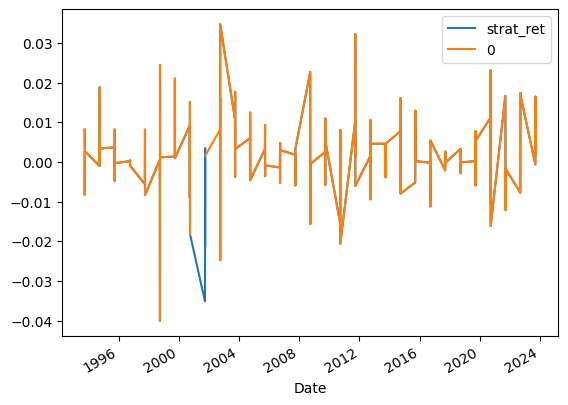

In [25]:
pd.concat([df1.loc[df1["active"], "strat_ret"], strat_ret[pos != 0.0]], axis=1).sort_index().plot()

## Describe Strategy

In [12]:
utils.describe(returns=strat_ret, pos=pos, daily=True, asset=TICKER)

Asset                           SPY
Start                    1993-01-29
End                      2024-02-16
Mean Return                0.24273%
Total Return                 43.06%
Median Return              0.20139%
1st Quartile              -0.32051%
3rd Quartile               0.81115%
Std Dev Return             1.03384%
CAGR                     23.743 bps
Trade CAGR                   1.162%
Ann. CAGR                   81.779%
Activity Ratio                1.93%
Number of Trades               31.0
Average Hold Period       4.87 Days
Daily Sharpe Ratio           0.2348
Ann. Sharpe Ratio            0.5179
Daily Sortino Ratio          0.3362
Ann. Sortino Ratio           0.7417
Daily Calmar Ratio           7.7732
Hit Ratio                    62.25%
Profit Factor                 1.95x
MDD                          -5.54%
MDD Start                1997-09-24
MDD Bottom               1998-09-22
MDD End                  1999-09-22
MDD Decline Duration         5 Days
MDD Recovery Duration       

In [44]:
utils.describe(returns=strat_ret.resample("YE").apply(lambda x: utils.get_cumulative_return(returns=x, total=True)), daily=False, asset=TICKER)

Asset                            SPY
Start                     1993-12-31
End                       2024-12-31
Mean Return                 1.13392%
Total Return                  42.07%
Median Return               0.57313%
1st Quartile               -0.73059%
3rd Quartile                2.33645%
Std Dev Return              2.54339%
CAGR                     110.341 bps
Trade CAGR                       N/A
Ann. CAGR                        N/A
Activity Ratio               100.00%
Number of Trades                 0.0
Average Hold Period       32.00 Days
Daily Sharpe Ratio            0.4458
Ann. Sharpe Ratio             7.0773
Daily Sortino Ratio           1.5993
Ann. Sortino Ratio           25.3877
Daily Calmar Ratio           11.8686
Hit Ratio                     59.38%
Profit Factor                  3.67x
MDD                           -3.54%
MDD Start                 2001-12-31
MDD Bottom                2007-12-31
MDD End                   2008-12-31
MDD Decline Duration          7 Days
M

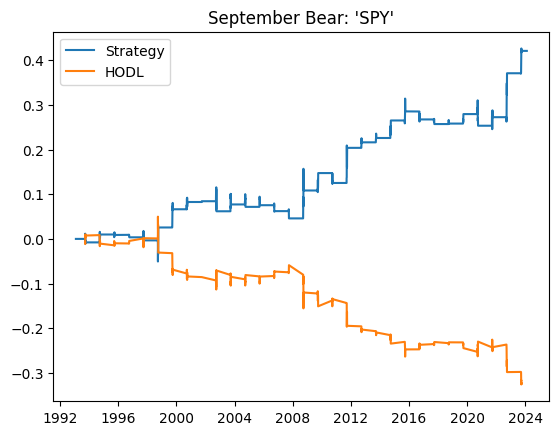

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(utils.get_cumulative_return(returns=strat_ret, total=False), label="Strategy")
ax.plot(utils.get_cumulative_return(returns=ret[pos != 0.0], total=False), label="HODL")

plt.title(f"September Bear: {TICKER!r}")
plt.legend(loc="best")
plt.show()